In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"


/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
data = input_data.read_data_sets('data/fashion',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print("training shape: {shape}".format(shape = data.train.images.shape))

training shape: (55000, 784)


In [4]:
label_dict = {
    0: 'T-shirt/top', 
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

Text(0.5,1,'(Label:Sneaker)')

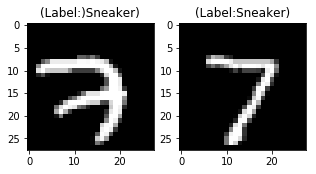

In [5]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img = np.reshape(data.train.images[0],(28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap = 'gray')
plt.title("(Label:)"+ str(label_dict[curr_lbl])+ ")")
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap = 'gray')
plt.title("(Label:"+ str(label_dict[curr_lbl])+")")

In [6]:
data.train.images[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
np.max(data.train.images[0])

0.9960785

In [8]:
np.min(data.train.images[1])

0.0

In [9]:
train_X = data.train.images.reshape(-1, 28,28,1)
test_X = data.test.images.reshape(-1, 28,28,1)

In [10]:
train_X.shape

(55000, 28, 28, 1)

In [11]:
test_X.shape

(10000, 28, 28, 1)

In [12]:
train_y = data.train.labels
test_y = data.test.labels

In [13]:
train_y.shape

(55000, 10)

In [14]:
training_iters = 10
learning_rate = 0.001
batch_size = 128

In [15]:
n_input = 28
n_classes = 10

In [16]:
x = tf.placeholder("float", [None, 28,28,1])

In [17]:
y = tf.placeholder("float", [None, n_classes])

In [18]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides =[1, strides, strides,1], padding ='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [19]:
def maxpool2d(x,k =2):
    return tf.nn.max_pool(x, ksize = [1,k,k,1], strides = [1,k,k,1], padding = 'SAME')


In [20]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}



In [21]:
def conv_net(x, weights, biases):
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k =2)
    
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k =2)
    
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out 


In [22]:
pred = conv_net(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels =y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [23]:
correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [24]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size: min((batch+1)*batch_size, len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]
            
            opt = sess.run(optimizer, feed_dict = {x: batch_x, y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict = {x: batch_x, y: batch_y})
            
        print("Iter" + str(i) + ", Loss = "+ \
                 "{: .6f}".format(loss) + ", Training accuracy =" + \
                  "{: .5f}".format(acc))
            
        print("Opt finished")
            
        test_acc, valid_loss = sess.run([accuracy, cost], feed_dict = {x: test_X, y: test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
            
    summary_writer.close()
                 
            

Iter0, Loss =  0.013289, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.96980
Iter1, Loss =  0.004215, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98360
Iter2, Loss =  0.002822, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98690
Iter3, Loss =  0.003130, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98790
Iter4, Loss =  0.002115, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98970
Iter5, Loss =  0.001938, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.99010
Iter6, Loss =  0.001574, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98970
Iter7, Loss =  0.000219, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.98900
Iter8, Loss =  0.000293, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.99060
Iter9, Loss =  0.000055, Training accuracy = 1.00000
Opt finished
Testing Accuracy: 0.99050


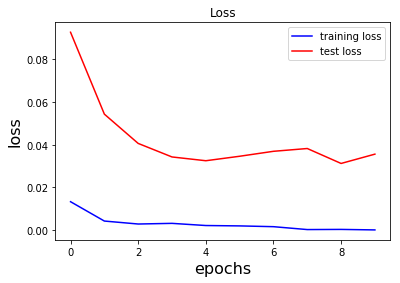

In [26]:
plt.plot(range(len(train_loss)), train_loss, 'b', label = 'training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label = 'test loss')
plt.title('Loss')
plt.xlabel('epochs', fontsize=16)
plt.ylabel('loss', fontsize =16)
plt.legend()
plt.figure()
plt.show()

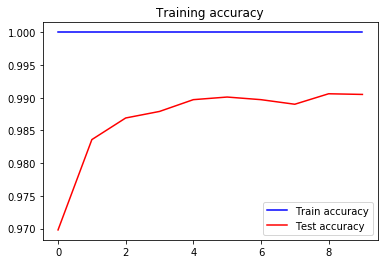

In [27]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label = 'Train accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label = 'Test accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.show()